# 1. Loading Data

The goal of this exploratory data analysis is to understand customer behavior patterns that contribute to churn.

This includes:
- Understanding the distibution of the target variable (Churn)
- Assessing data quality issues
- Identifying features that may be predictive of churn
- Generating insights to inform feature engineering and modeling

In [1]:
import sys
print(sys.executable)


c:\Users\julia\Documents\ds-personal-projects\customer-churn-prediction\.venv\Scripts\python.exe


In [4]:
import pandas as pd

DATA_PATH = "../data/raw/telco_churn.csv"
df = pd.read_csv(DATA_PATH)

df.head(), df.shape


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data Overview

- The dataset contains customer-level information including demographics, service usage, and billing details.
- Both numberical and categorical features are present
- The target variable is "Churn", indicating whether a customer has left the service.

# 3. Target Variable: Churn

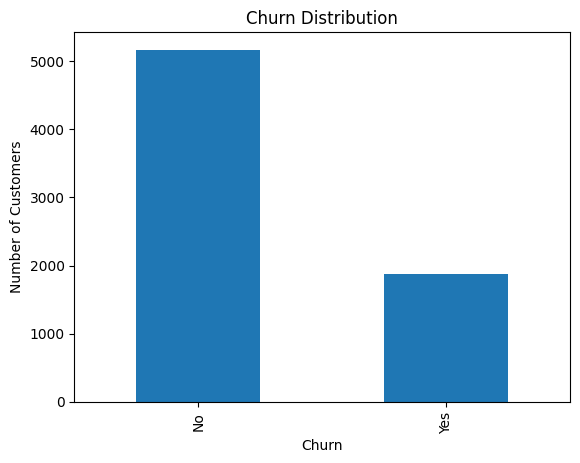

In [11]:
df["Churn"].value_counts(normalize=True)

import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


## Interpretation:
- The dataset is moderately imbalanced, with fewer churned customers than retained customers.
- This imbalance should be considered during modeling and evaluation.

# 4. Data Quality Checks

In [ ]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Duplicates
df.duplicated().sum()

np.int64(0)

### Interpretation:
- No significant missing values were found.
- No duplicate records were detected.

# 5. Numeric Features Analysis

Focusing on key numeric features:
- tenure
- MonthlyCharges
- TotalCharges

In [20]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[numeric_cols].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


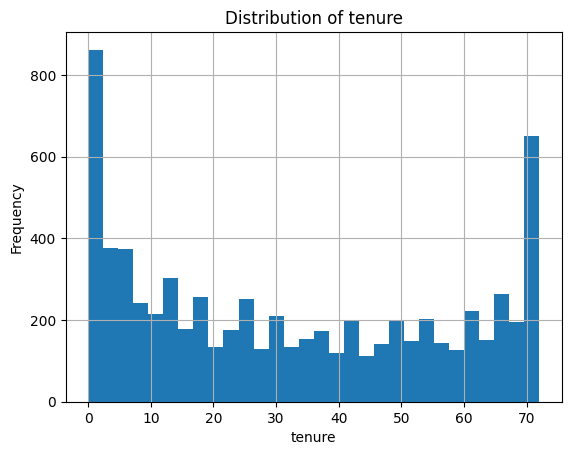

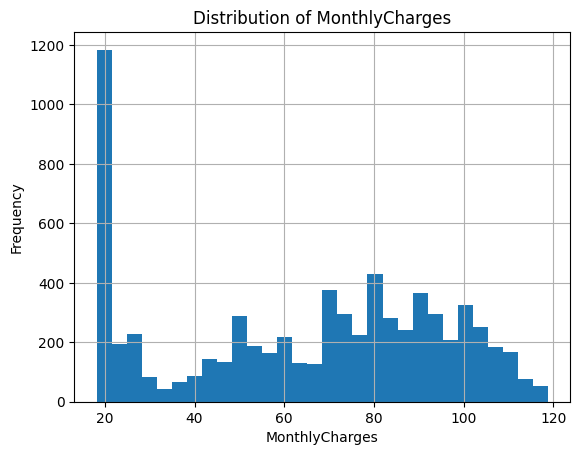

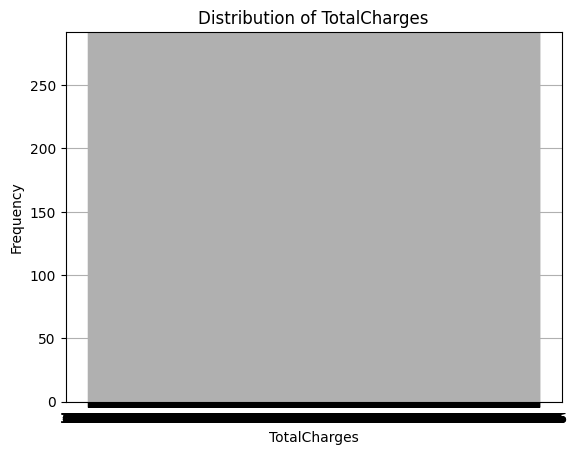

In [19]:
for col in numeric_cols:
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 6. Categorical Features Analysis

# 7. EDA Summary